### Tugas Praktikum
#### Multiple Linear Regression
---

#### Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [57]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [58]:
# Baca dataset
data = pd.read_csv('data/insurance.csv')

# informasi tentang data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Deskripsi Dataset
Dataset ini berisi informasi tentang biaya medis personal pasien, dengan beberapa fitur seperti usia, jenis kelamin, bmi (Body Mass Index), jumlah anak-anak, apakah seseorang perokok atau bukan, dan wilayah tempat tinggal.

Identifikasi variabel bebas (fitur) dan variabel target
- Variabel bebas (fitur): 'age', 'sex', 'bmi', 'children', 'smoker', 'region'
- Variabel target: 'charges'

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


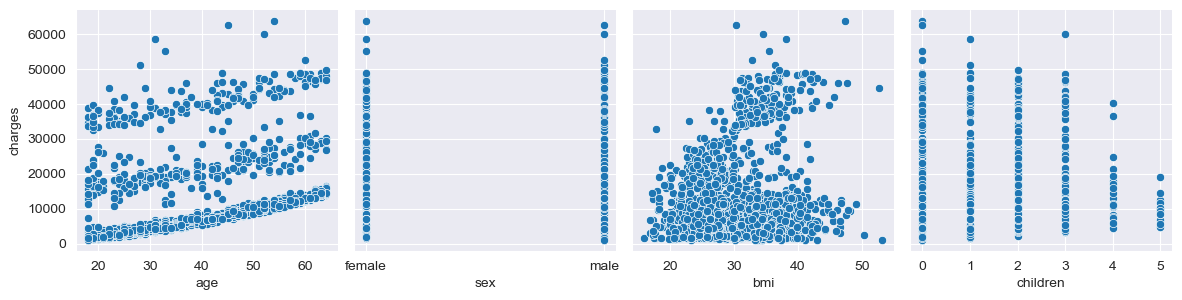

In [59]:
# Operasi visualisasi
sns.pairplot(data, x_vars=['age', 'sex', 'bmi','children'],
             y_vars='charges', size=3, aspect=1, kind='scatter')
plt.show()

#### Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [60]:
# Proses encoding untuk kolom non-numeric
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])
data.head()  # Menampilkan lima baris pertama dari DataFrame yang sudah dipilih kolomnya

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [61]:
# Pisahkan data menjadi data latih (train) dan data uji (test)
X = data.drop(columns=["charges"])
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_test:\n{X_test}\n')
print(f'Y_test: {y_test}')

X_test:
      age  sex     bmi  children  smoker  region
764    45    0  25.175         2       0       0
887    36    0  30.020         0       0       1
890    64    0  26.885         0       1       1
1293   46    1  25.745         3       0       1
259    19    1  31.920         0       1       1
...   ...  ...     ...       ...     ...     ...
109    63    1  35.090         0       1       2
575    58    0  27.170         0       0       1
535    38    1  28.025         1       0       0
543    54    0  47.410         0       1       2
846    51    0  34.200         1       0       3

[268 rows x 6 columns]

Y_test: 764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64


#### Lakukan feature scaling jika diperlukan.

In [62]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#### Buat model multiple linear regression menggunakan Scikit-Learn.

In [63]:
# Buat model regresi linear
model = LinearRegression()

#### Latih model pada data latih dan lakukan prediksi pada data uji.

In [64]:
# Latih model pada data latih
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

#### Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [65]:
# Evaluasi model
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 33635210.431178406
R-squared: 0.7833463107364539
Mean Absolute Error (MAE): 4186.508898366435


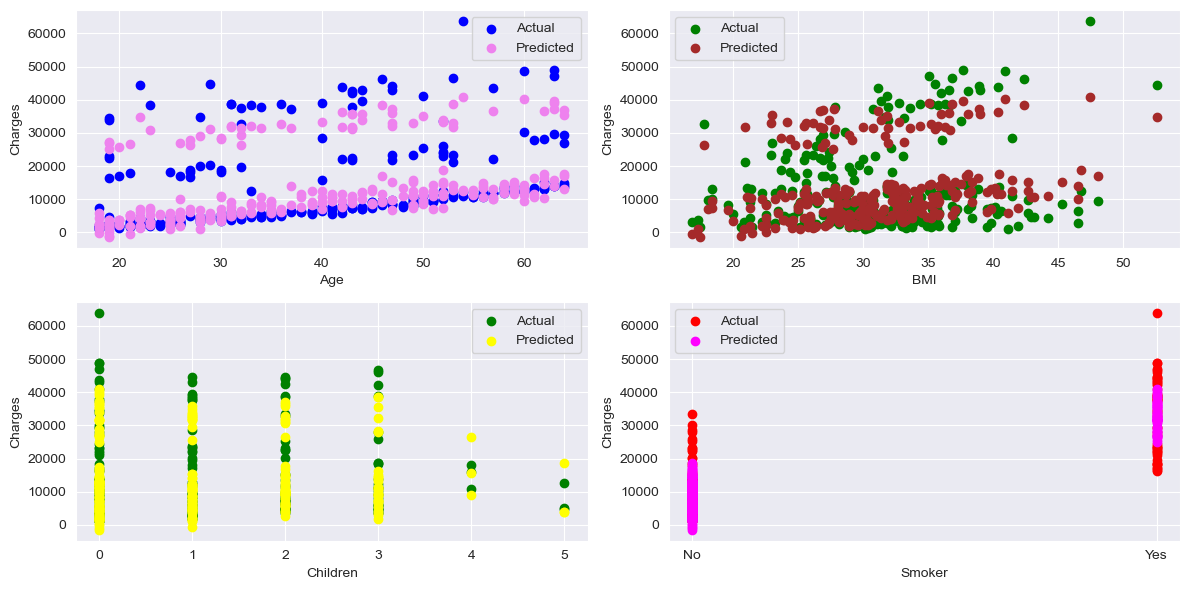

In [66]:
# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Sebar plot untuk 'usia' vs. 'biaya'
plt.subplot(2, 2, 1)
plt.scatter(X_test['age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['age'], y_pred, color='violet', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'bmi' vs. 'biaya'
plt.subplot(2, 2, 2)
plt.scatter(X_test['bmi'], y_test, color='green', label='Actual')
plt.scatter(X_test['bmi'], y_pred, color='brown', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'children' vs. 'charges'
plt.subplot(2, 2, 3)
plt.scatter(X_test['children'], y_test, color='green', label='Actual')
plt.scatter(X_test['children'], y_pred, color='yellow', label='Predicted')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'smoker' vs. 'charges'
plt.subplot(2, 2, 4)
plt.scatter(X_test['smoker'], y_test, color='red', label='Actual')
plt.scatter(X_test['smoker'], y_pred, color='magenta', label='Predicted')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()

# Tampilkan semua plot
plt.tight_layout()
plt.show()

#### Analisis Hasil

Dalam analisis ini, menggunakan model regresi linear untuk memprediksi biaya medis personal berdasarkan beberapa fitur seperti usia, jenis kelamin, bmi, jumlah anak-anak, apakah seseorang perokok atau bukan, dan wilayah tempat tinggal.

Hasil evaluasi model:
- R-squared (R^2): R-squared adalah ukuran seberapa baik model kita cocok dengan data. Nilai yang lebih tinggi menunjukkan fit yang lebih baik. Hasil R-squared yang baik mendekati 1.0. 
- Mean Squared Error (MSE): MSE mengukur seberapa dekat prediksi kita dengan nilai aktual. Semakin rendah nilai MSE, semakin baik modelnya.
- Mean Absolute Error (MAE): MAE mengukur kesalahan rata-rata dalam prediksi kita. Semakin rendah nilai MAE, semakin baik modelnya.

Selanjutnya, Melakukan visualisasi sebaran prediksi model terhadap beberapa fitur seperti usia, bmi, jumlah anak-anak, dan apakah seseorang perokok atau bukan untuk melihat seberapa baik model kita memprediksi biaya medis personal.
